In [19]:
from AnalyzeMot import AnalyzeMOT
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import mp1_config

def zoom_matrix(n, image, xoffset=0, yoffset=0):
    shape = np.shape(image)
    center_x, center_y = shape[0] // 2, shape[1] // 2
    start_x = max(center_x - (n-yoffset), 0)
    end_x = min(center_x + (n+yoffset), shape[0])
    start_y = max(center_y - (n+xoffset), 0)
    end_y = min(center_y + (n-xoffset), shape[1])
    
    return image[start_x:end_x, start_y:end_y]

In [20]:
mot = AnalyzeMOT('./Data/Spectroscopy')

# Initialize dict
groups = {}

for file in mot.files : 
    # Split file name before and after "-"
    prefix = file.split("-")[0]
    #if float(prefix) != 105.4 :
    
    # Add key to dict
    if prefix not in groups : 
        groups[prefix] = []
    # Append file to list of key "prefix"
    groups[prefix].append(file)

# Sort groups based on keys
groups = {k: groups[k] for k in sorted(groups, key=lambda x: float(x))}

for group, filenames in groups.items() : 
    print(f"{group}: \t {len(filenames)}, \t {filenames}")


94.8: 	 15, 	 ['94.8-78.tiff', '94.8-79.tiff', '94.8-80.tiff', '94.8-81.tiff', '94.8-82.tiff', '94.8-83.tiff', '94.8-84.tiff', '94.8-85.tiff', '94.8-86.tiff', '94.8-87.tiff', '94.8-88.tiff', '94.8-89.tiff', '94.8-90.tiff', '94.8-91.tiff', '94.8-92.tiff']
96.8: 	 15, 	 ['96.8-100.tiff', '96.8-101.tiff', '96.8-102.tiff', '96.8-103.tiff', '96.8-104.tiff', '96.8-105.tiff', '96.8-106.tiff', '96.8-107.tiff', '96.8-93.tiff', '96.8-94.tiff', '96.8-95.tiff', '96.8-96.tiff', '96.8-97.tiff', '96.8-98.tiff', '96.8-99.tiff']
98.8: 	 15, 	 ['98.8-108.tiff', '98.8-109.tiff', '98.8-110.tiff', '98.8-111.tiff', '98.8-112.tiff', '98.8-113.tiff', '98.8-114.tiff', '98.8-115.tiff', '98.8-116.tiff', '98.8-117.tiff', '98.8-118.tiff', '98.8-119.tiff', '98.8-120.tiff', '98.8-121.tiff', '98.8-122.tiff']
100.8: 	 15, 	 ['100.8-123.tiff', '100.8-124.tiff', '100.8-125.tiff', '100.8-126.tiff', '100.8-127.tiff', '100.8-128.tiff', '100.8-129.tiff', '100.8-130.tiff', '100.8-131.tiff', '100.8-132.tiff', '100.8-133.tiff'

In [21]:
resonance = 211.7           # MHz
natural_linewidth = 6.066   # MHz

# Add secondary x-axis for frequencies
def detunings_to_frequencies(detuning):
    # Transformation: from detunings to frequencies
    return (resonance + detuning * natural_linewidth ) * 0.5

def frequencies_to_detunings(frequency):
    # Inverse transformation: from frequencies to detunings
    return (2*frequency - resonance )/natural_linewidth 

In [22]:

frequencies = []
avg_images = []
avg_intensities = []
std_intensities = []

for group, files in groups.items() : 

    images = []
    for file in files : 
        corr_im = mot.get_image_matrix(file).astype(np.int16)
        np.clip(corr_im, a_min=0, a_max=255, out=corr_im)
        images.append(corr_im)


    intensities = np.array([ np.sum(image) for image in images ])
    
    avg_images.append( np.mean( images, axis=0 ) )
    avg_intensities.append( np.mean( intensities ) )
    std_intensities.append( np.std( intensities ) )
    frequencies.append(float(group))

detunings = frequencies_to_detunings(np.array(frequencies)) 


In [23]:
print(frequencies)
print(detunings)
print(avg_intensities)

[94.8, 96.8, 98.8, 100.8, 102.8, 104.8, 105.8, 106.8, 107.5, 108.5]
[-3.6432575  -2.98384438 -2.32443126 -1.66501813 -1.00560501 -0.34619189
 -0.01648533  0.31322123  0.54401583  0.87372239]
[57989.13333333333, 248686.93333333332, 782102.2, 1815074.1333333333, 3162987.466666667, 4347863.2, 4337003.733333333, 3948160.933333333, 3125052.75, 3012587.2]


(-176651.10007753843, 4677302.275196554)
104.8


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_12216/2036252908.py:7: SyntaxWarning: invalid escape sequence '\d'
  ax.set_xlabel("Detuning, $\delta$ [$\Gamma$]", labelpad=10, fontsize=12)


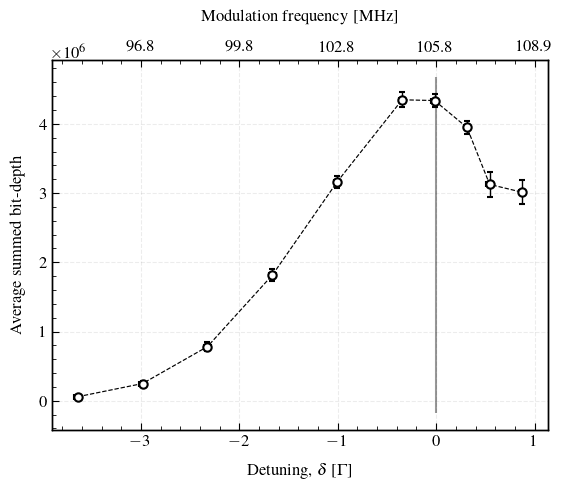

In [24]:
fig, ax = plt.subplots()

derrs = (frequencies_to_detunings(np.array(frequencies)+0.05)-frequencies_to_detunings(np.array(frequencies)-0.05)) 

ax.errorbar(detunings, avg_intensities, fmt='o--', yerr=std_intensities, xerr=derrs,
            markeredgecolor='k', markeredgewidth=1.5, markerfacecolor='white', color='k', linewidth=0.85, elinewidth=1.0, capsize=2.0, ecolor='k')
ax.set_xlabel("Detuning, $\delta$ [$\Gamma$]", labelpad=10, fontsize=12)
ax.set_ylabel("Average summed bit-depth", labelpad=10, fontsize=12)


lims = ax.get_ylim()
print(lims)
ax.vlines(x=0, ymin=lims[0], ymax=lims[1], color='k', alpha=0.4)

ax2 = ax.twiny()

new_tick_locations = ax.get_xticks()

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations[1:-1])
ax2.set_xticklabels(np.around(detunings_to_frequencies(new_tick_locations[1:-1]),1))
ax2.set_xlabel("Modulation frequency [MHz]", labelpad=14, fontsize=12)

ax.grid(alpha=0.15)

argmax = np.argmax(avg_intensities)
print(frequencies[np.argmax(avg_intensities)])
#ax.plot(detunings[argmax], avg_intensities[argmax], 's', markeredgewidth=2.0, markerfacecolor='white', color='darkred')
fig.savefig("./Figures/tof_frequencies_intensities.png", format='png', bbox_inches="tight", dpi=300)


In [31]:
xoffset, yoffset = -20, 0
zoomsize = 300

zoomed_avgs = [zoom_matrix(zoomsize, image, xoffset=xoffset, yoffset=yoffset) for image in avg_images]

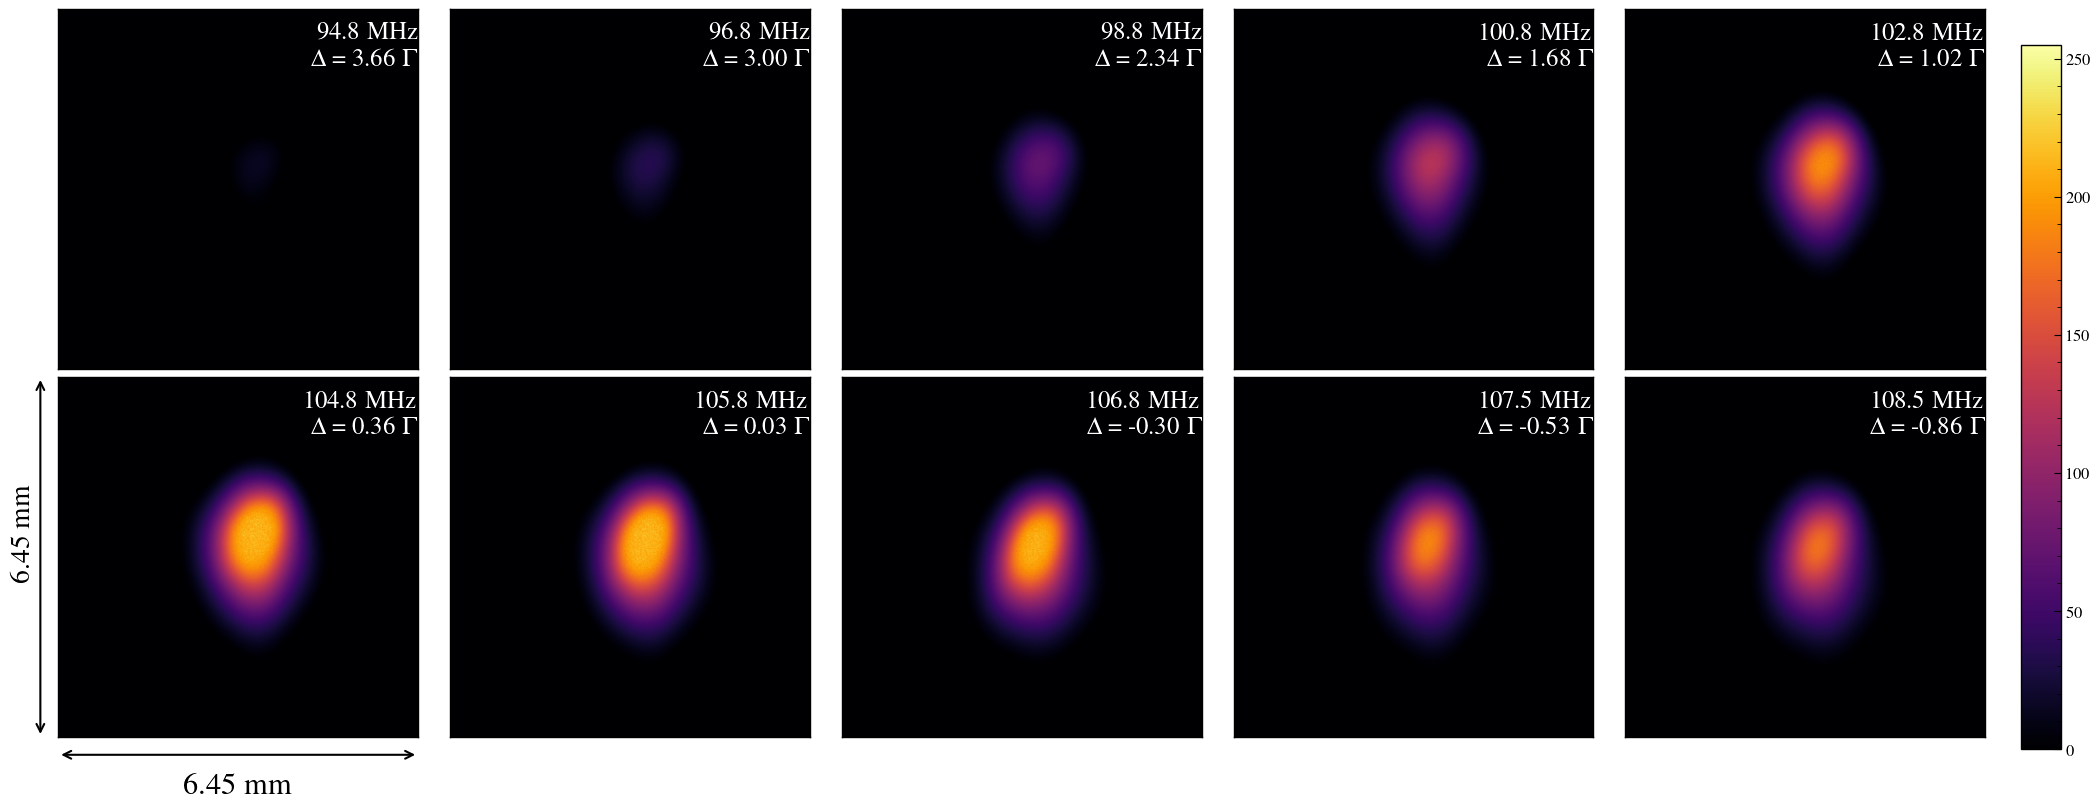

In [39]:
rows = 2
cols = 5
fig, axs = plt.subplots(rows,cols, sharex=True, sharey=True, figsize=(cols*4,4*rows), constrained_layout=True)

plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = -14  # pad is in points...

vmax = 255
vmin = 0

padding = -40
fz = 18
maptype = 'inferno'
titloc = 'right'
titcol = 'white'

conv = np.around((np.shape(avg_images)[0]/1024)*11.0, 1)

conv = np.around( (zoomsize*2)/1024*11.0, 2)

axlist = axs.flatten()

im0 = None

for i, (im, ax) in enumerate(zip(zoomed_avgs, axlist)) : 
    if i == 0 : im0 = ax.imshow(im, vmax=vmax, vmin=vmin, cmap=maptype, aspect='equal')
    else : ax.imshow(im, vmax=vmax, vmin=vmin, cmap=maptype, aspect='equal')
    title = rf"{frequencies[i]} MHz  "+"\n"+rf"$\Delta$ = {(211.796-2*frequencies[i])/6.066:.2f} $\Gamma$" + "      "
    ax.set_title(title, pad=padding, fontsize=fz, loc=titloc, color=titcol, y=1.0 )

    if(i == cols*(rows-1)) : 
        ax.annotate('', xy=(0, -0.05), xycoords='axes fraction', xytext=(1, -0.05), 
                    arrowprops=dict(arrowstyle="<->", color='k', linewidth=1.5))
        ax.text(0.5, -0.1, "{} mm".format(conv), fontsize=fz+4, fontfamily='serif',
        ha='center', va='top', transform=ax.transAxes)

        ax.annotate('', xy=(-0.05, 0), xycoords='axes fraction', xytext=(-0.05, 1), 
                    arrowprops=dict(arrowstyle="<->", color='k', linewidth=1.5))
        
        ax.text(-0.1, 0.7, "{} mm".format(conv), rotation=90, fontsize=fz+2, fontfamily='serif',
        ha='center', va='top', transform=ax.transAxes)

    
# Create a new axes for the colorbar
cbar_ax = fig.add_axes([1.01, 0.07, 0.02, 0.88])  # Adjust [left, bottom, width, height]

# Create colorbar in the new axes
fig.colorbar(im0, cax=cbar_ax)

for a in axlist : 
    a.get_xaxis().set_visible(False)
    a.get_yaxis().set_visible(False)

fig.savefig("./Figures/tof_frequencies_average_images.png", format='png', bbox_inches="tight", dpi=700)

In [27]:
print(conv)

6.45
